## Compare k-medians, k-medians++, gon-k-center, hs-k-center, and kc-Opt with the Norm-Imb synthetic datasets (and plot)

In [1]:

import sys
import os
sys.path.append('../')
from Codes.model import *
from Codes.utils import *

plt.style.use('default')


import pickle
RESULT_DIR = "../../ExptsPaper"
# os.mkdir(RESULT_DIR)
from timeit import default_timer
from sklearn.datasets import make_blobs

from tqdm.notebook import tqdm


In [3]:

def Unbalanced_Blobs(N, centers, K,D,ratio,seed):

    N1 = int(N/(ratio+1))
    N2 = N1*ratio
    split = int(K/2)

    # Sparse blobs
    X, y= make_blobs(n_samples=N1, centers=centers[0:split,:], n_features=D, cluster_std = 1,
                    random_state=seed)

    # Dense Blobs
    X1, y1 = make_blobs(n_samples=N2, centers=centers[split:,:], n_features=D, cluster_std = 1.,
                    random_state=seed)

    y1 = y1+(split+1)    

    X = np.concatenate((X,X1), axis = 0)
    y = np.concatenate((y,y1), axis = 0)

    cols = [ 'X' + str(i+1) for i in range(D) ]
    df_data = pd.DataFrame(X, columns = cols)

        
    return df_data, X,y




Variation in cluster sizes with ratio = 10
 4    2270
3    2270
0     227
1     227
dtype: int64


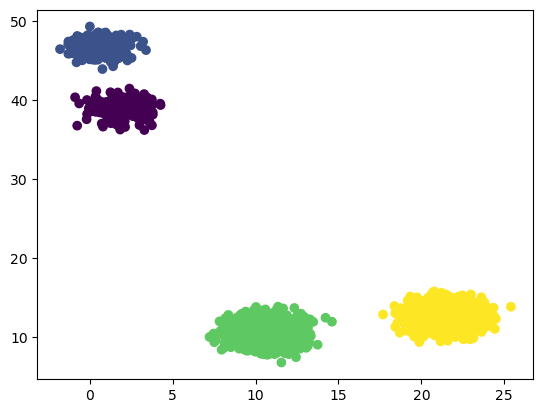

In [13]:
N = 5000
D = 2
K = 4
centers = np.array([[ 1.92808404, 39.00502303],
       [ 0.69454242, 46.8079268 ],
       [ 10.63518777, 10.64463432],
       [21.32871909, 12.65432254]])
seed = 34
ratio = 10

df_data, X,y = Unbalanced_Blobs(N, centers, K,D,ratio, seed)

print('Variation in cluster sizes with ratio = 10\n', pd.Series(y).value_counts() )
_,ax = plt.subplots(1)
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

Variation in cluster sizes with ratio = 10
 8    1135
5    1135
6    1135
7    1135
0     114
1     114
2     113
3     113
dtype: int64


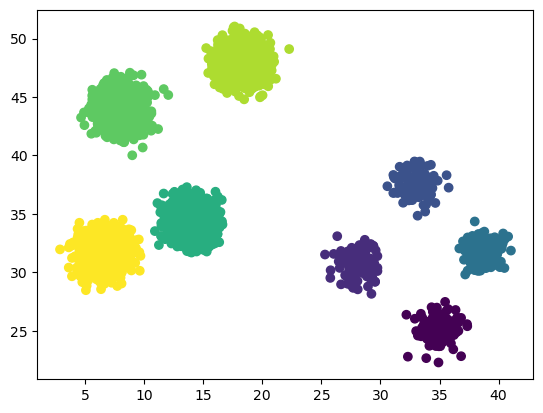

In [14]:
N = 5000
D = 2
K = 8
centers = np.array( [[35 ,25],
 [27.86698081 ,30.93121952],
 [33.06704928, 37.70088455],
 [38.65977775, 31.81837918],
 [13.93260605, 34.54869698],
 [ 8.07515412, 43.83882154],
 [18.20529568, 47.88322387],
 [ 6.52889942, 31.7268767 ]] )
seed = 34
ratio = 10

df_data, X,y = Unbalanced_Blobs(N, centers, K,D,ratio, seed)
print('Variation in cluster sizes with ratio = 10\n', pd.Series(y).value_counts() )

_,ax = plt.subplots(1)
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

## MINMAX

### Dataset1

In [5]:
N = 5000
D = 2
K = 4
centers = np.array([[ 1.92808404, 39.00502303],
       [ 0.69454242, 46.8079268 ],
       [ 10.63518777, 10.64463432],
       [21.32871909, 12.65432254]])
seed = 34

ratio_list = [5,10,15,20,25]

optgap_list=[]

time_list = []
metrics_list = []

epsVal_list = []
centers_list = []

obj_list = []
constrsCnt_list = []
for i, ratio in enumerate(tqdm(ratio_list)):

    print('\nStarting Dense/Sparse ratio = %i' %(ratio))

    df_data, X,y = Unbalanced_Blobs(N, centers, K,D,ratio, seed)

    clus = UnsupervisedClustering(K =K , max_iter= 30, random_state=0)
    clus.set_model(MinMax(initConstrCnt=6, optimalGap= 0.01, tol = 0.05, time = 30))

    start = default_timer()
    clus.fit(df_data )

    end = default_timer()
    metrics_list.append(clus.evaluate(y))
    # print(metrics_list[-1])
    time_list.append(end-start)

    constrsCnt_list.append(len(clus.constr_gen_pts))
    optgap_list.append(clus.model_optGap)
    obj_list.append(clus)

    epsVal_list.append(clus.epsVal)
    centers_list.append(clus.cluster_centers)


    print('Finished running Dense/Sparse ratio = %i' %(ratio))
    print('*'*100)




with open(os.path.join(RESULT_DIR, 'Syn2_'+str(K)+str(D)+'_MM.pkl'), 'wb') as outp:

    pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(constrsCnt_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optgap_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(centers_list, outp, pickle.HIGHEST_PROTOCOL)




  0%|          | 0/5 [00:00<?, ?it/s]


Starting Dense/Sparse ratio = 5
MinMax model 0
# of outliers:  0
Set parameter Username
Academic license - for non-commercial use only - expires 2023-07-08
Set parameter TimeLimit to value 1800
Set parameter MIPGap to value 0.01
E:  5.158361188718331
E:  5.1583611887183345
Optimal solution reached with Cost:  5.1583611887183345


# of constraints added:  38
Finished running Dense/Sparse ratio = 5
****************************************************************************************************

Starting Dense/Sparse ratio = 10
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 1800
Set parameter MIPGap to value 0.01
E:  5.1583611887183345
E:  5.158361188718334
Optimal solution reached with Cost:  5.158361188718334


# of constraints added:  37
Finished running Dense/Sparse ratio = 10
****************************************************************************************************

Starting Dense/Sparse ratio = 15
MinMax model 0
# of outliers:  0
Set parameter TimeL

### Dataset2

In [7]:
N = 5000
D = 2
K = 8
centers = np.array( [[35 ,25],
 [27.86698081 ,30.93121952],
 [33.06704928, 37.70088455],
 [38.65977775, 31.81837918],
 [13.93260605, 34.54869698],
 [ 8.07515412, 43.83882154],
 [18.20529568, 47.88322387],
 [ 6.52889942, 31.7268767 ]] )
seed = 34

ratio_list = [5,10,15,20,25]

optgap_list=[]

time_list = []
metrics_list = []

epsVal_list = []
centers_list = []

obj_list = []
constrsCnt_list = []
for i, ratio in enumerate(tqdm(ratio_list)):

    print('\nStarting Dense/Sparse ratio = %i' %(ratio))

    df_data, X,y = Unbalanced_Blobs(N, centers, K,D,ratio, seed)

    clus = UnsupervisedClustering(K =K , max_iter= 30, random_state=0)
    clus.set_model(MinMax(initConstrCnt=6, optimalGap= 0.01, tol = 0.05, time = 30))

    start = default_timer()
    clus.fit(df_data )

    end = default_timer()
    metrics_list.append(clus.evaluate(y))
    # print(metrics_list[-1])
    time_list.append(end-start)

    constrsCnt_list.append(len(clus.constr_gen_pts))
    optgap_list.append(clus.model_optGap)
    obj_list.append(clus)

    epsVal_list.append(clus.epsVal)
    centers_list.append(clus.cluster_centers)


    print('Finished running Dense/Sparse ratio = %i' %(ratio))
    print('*'*100)




with open(os.path.join(RESULT_DIR, 'Syn2_'+str(K)+str(D)+'_MM.pkl'), 'wb') as outp:

    pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(constrsCnt_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optgap_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(centers_list, outp, pickle.HIGHEST_PROTOCOL)





  0%|          | 0/5 [00:00<?, ?it/s]


Starting Dense/Sparse ratio = 5
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 1800
Set parameter MIPGap to value 0.01
E:  4.972902252512741
E:  4.972902252512741
E:  4.972902251915445
E:  4.9729022525127355
E:  4.972902252512741
Optimal solution reached with Cost:  4.972902252512741


# of constraints added:  79
Finished running Dense/Sparse ratio = 5
****************************************************************************************************

Starting Dense/Sparse ratio = 10
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 1800
Set parameter MIPGap to value 0.01
E:  4.674964664980337
E:  4.67496466498033
E:  4.972902252512741
Optimal solution reached with Cost:  4.972902252512741


# of constraints added:  74
Finished running Dense/Sparse ratio = 10
****************************************************************************************************

Starting Dense/Sparse ratio = 15
MinMax model 0
# of outliers:  0
Set parameter TimeLimit t

## KMedians with random initialization

### Dataset1

In [9]:
N = 5000
D = 2
K = 4
centers = np.array([[ 1.92808404, 39.00502303],
       [ 0.69454242, 46.8079268 ],
       [ 10.63518777, 10.64463432],
       [21.32871909, 12.65432254]])
seed = 34

ratio_list = [5,10,15,20,25]


time_list = []
metrics_list = []

obj_list = []



epsVal_list = []
centers_list = []


for i, ratio in enumerate(tqdm(ratio_list)):


    print('\nStarting Dense/Sparse ratio = %i' %(ratio))

    df_data, X,y = Unbalanced_Blobs(N, centers, K,D,ratio, seed)

    metrics_list_inner = []
    time_list_inner = []

    
    epsVal_list_inner = []
    centers_list_inner = []


    for j in range(10):
        
        km = UnsupervisedClustering(K =K, max_iter= 300)
        km.set_model(KMedian())

        start = default_timer()
        km.fit(df_data )

        end = default_timer()
        metrics_list_inner.append(km.evaluate(y))
    
        time_list_inner.append(end - start)

        epsVal_list_inner.append(km.epsVal)
        centers_list_inner.append(km.cluster_centers)

 
    time_list.append(np.average(time_list_inner))
    metrics_list.append(np.average(metrics_list_inner,axis=0))
           
    epsVal_list.append(np.average(epsVal_list_inner))
    centers_list.append(epsVal_list_inner)

    print('Finished running Dense/Sparse ratio = %i' %(ratio))
    print('*'*100)




with open(os.path.join(RESULT_DIR, 'Syn2_'+str(K)+str(D)+'_KM.pkl'), 'wb') as outp:

    pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(centers_list, outp, pickle.HIGHEST_PROTOCOL)




  0%|          | 0/5 [00:00<?, ?it/s]


Starting Dense/Sparse ratio = 5
Finished running Dense/Sparse ratio = 5
****************************************************************************************************

Starting Dense/Sparse ratio = 10
Finished running Dense/Sparse ratio = 10
****************************************************************************************************

Starting Dense/Sparse ratio = 15
Finished running Dense/Sparse ratio = 15
****************************************************************************************************

Starting Dense/Sparse ratio = 20
Finished running Dense/Sparse ratio = 20
****************************************************************************************************

Starting Dense/Sparse ratio = 25
Finished running Dense/Sparse ratio = 25
****************************************************************************************************


### Dataset2

In [11]:
N = 5000
D = 2
K = 8
centers = np.array( [[35 ,25],
 [27.86698081 ,30.93121952],
 [33.06704928, 37.70088455],
 [38.65977775, 31.81837918],
 [13.93260605, 34.54869698],
 [ 8.07515412, 43.83882154],
 [18.20529568, 47.88322387],
 [ 6.52889942, 31.7268767 ]] )
seed = 34

ratio_list = [5,10,15,20,25]


time_list = []
metrics_list = []

obj_list = []


epsVal_list = []
centers_list = []


for i, ratio in enumerate(tqdm(ratio_list)):


    print('\nStarting Dense/Sparse ratio = %i' %(ratio))

    df_data, X,y = Unbalanced_Blobs(N, centers, K,D,ratio, seed)

    metrics_list_inner = []
    time_list_inner = []

    
    epsVal_list_inner = []
    centers_list_inner = []


    for j in range(10):
        
        km = UnsupervisedClustering(K =K, max_iter= 300)
        km.set_model(KMedian())

        start = default_timer()
        km.fit(df_data )

        end = default_timer()
        metrics_list_inner.append(km.evaluate(y))
    
        time_list_inner.append(end - start)

        epsVal_list_inner.append(km.epsVal)
        centers_list_inner.append(km.cluster_centers)

 
    time_list.append(np.average(time_list_inner))
    metrics_list.append(np.average(metrics_list_inner,axis=0))
           
    epsVal_list.append(np.average(epsVal_list_inner))
    centers_list.append(epsVal_list_inner)

    print('Finished running Dense/Sparse ratio = %i' %(ratio))
    print('*'*100)




with open(os.path.join(RESULT_DIR, 'Syn2_'+str(K)+str(D)+'_KM.pkl'), 'wb') as outp:

    pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(centers_list, outp, pickle.HIGHEST_PROTOCOL)




  0%|          | 0/5 [00:00<?, ?it/s]


Starting Dense/Sparse ratio = 5
Finished running Dense/Sparse ratio = 5
****************************************************************************************************

Starting Dense/Sparse ratio = 10
Finished running Dense/Sparse ratio = 10
****************************************************************************************************

Starting Dense/Sparse ratio = 15
Finished running Dense/Sparse ratio = 15
****************************************************************************************************

Starting Dense/Sparse ratio = 20
Finished running Dense/Sparse ratio = 20
****************************************************************************************************

Starting Dense/Sparse ratio = 25
Finished running Dense/Sparse ratio = 25
****************************************************************************************************


## KMedians with KM++ initialization

### Dataset1

In [13]:
N = 5000
D = 2
K = 4
centers = np.array([[ 1.92808404, 39.00502303],
       [ 0.69454242, 46.8079268 ],
       [ 10.63518777, 10.64463432],
       [21.32871909, 12.65432254]])
seed = 34

ratio_list = [5,10,15,20,25]


time_list = []
metrics_list = []

obj_list = []

epsVal_list = []
centers_list = []


for i, ratio in enumerate(tqdm(ratio_list)):


    print('\nStarting Dense/Sparse ratio = %i' %(ratio))

    df_data, X,y = Unbalanced_Blobs(N, centers, K,D,ratio, seed)

    metrics_list_inner = []
    time_list_inner = []

    
    epsVal_list_inner = []
    centers_list_inner = []


    for j in range(10):
        
        kmPlus = UnsupervisedClustering(K =K, max_iter= 300)
        kmPlus.set_model(KMedian_Plus())

        start = default_timer()
        kmPlus.fit(df_data )

        end = default_timer()
        metrics_list_inner.append(kmPlus.evaluate(y))
    
        time_list_inner.append(end - start)

        epsVal_list_inner.append(kmPlus.epsVal)
        centers_list_inner.append(kmPlus.cluster_centers)

 
    time_list.append(np.average(time_list_inner))
    metrics_list.append(np.average(metrics_list_inner,axis=0))
           
    epsVal_list.append(np.average(epsVal_list_inner))
    centers_list.append(epsVal_list_inner)

    print('Finished running Dense/Sparse ratio = %i' %(ratio))
    print('*'*100)




with open(os.path.join(RESULT_DIR, 'Syn2_'+str(K)+str(D)+'_KMPlus.pkl'), 'wb') as outp:

    pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(centers_list, outp, pickle.HIGHEST_PROTOCOL)




  0%|          | 0/5 [00:00<?, ?it/s]


Starting Dense/Sparse ratio = 5
Finished running Dense/Sparse ratio = 5
****************************************************************************************************

Starting Dense/Sparse ratio = 10
Finished running Dense/Sparse ratio = 10
****************************************************************************************************

Starting Dense/Sparse ratio = 15
Finished running Dense/Sparse ratio = 15
****************************************************************************************************

Starting Dense/Sparse ratio = 20
Finished running Dense/Sparse ratio = 20
****************************************************************************************************

Starting Dense/Sparse ratio = 25
Finished running Dense/Sparse ratio = 25
****************************************************************************************************


### Dataset2

In [15]:
N = 5000
D = 2
K = 8
centers = np.array( [[35 ,25],
 [27.86698081 ,30.93121952],
 [33.06704928, 37.70088455],
 [38.65977775, 31.81837918],
 [13.93260605, 34.54869698],
 [ 8.07515412, 43.83882154],
 [18.20529568, 47.88322387],
 [ 6.52889942, 31.7268767 ]] )
seed = 34

ratio_list = [5,10,15,20,25]


time_list = []
metrics_list = []

obj_list = []

epsVal_list = []
centers_list = []


for i, ratio in enumerate(tqdm(ratio_list)):


    print('\nStarting Dense/Sparse ratio = %i' %(ratio))

    df_data, X,y = Unbalanced_Blobs(N, centers, K,D,ratio, seed)

    metrics_list_inner = []
    time_list_inner = []

    
    epsVal_list_inner = []
    centers_list_inner = []


    for j in range(10):
        
        kmPlus = UnsupervisedClustering(K =K, max_iter= 300)
        kmPlus.set_model(KMedian_Plus())

        start = default_timer()
        kmPlus.fit(df_data )

        end = default_timer()
        metrics_list_inner.append(kmPlus.evaluate(y))
    
        time_list_inner.append(end - start)

        epsVal_list_inner.append(kmPlus.epsVal)
        centers_list_inner.append(kmPlus.cluster_centers)

 
    time_list.append(np.average(time_list_inner))
    metrics_list.append(np.average(metrics_list_inner,axis=0))
           
    epsVal_list.append(np.average(epsVal_list_inner))
    centers_list.append(epsVal_list_inner)

    print('Finished running Dense/Sparse ratio = %i' %(ratio))
    print('*'*100)




with open(os.path.join(RESULT_DIR, 'Syn2_'+str(K)+str(D)+'_KMPlus.pkl'), 'wb') as outp:

    pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(centers_list, outp, pickle.HIGHEST_PROTOCOL)


  0%|          | 0/5 [00:00<?, ?it/s]


Starting Dense/Sparse ratio = 5
Finished running Dense/Sparse ratio = 5
****************************************************************************************************

Starting Dense/Sparse ratio = 10
Finished running Dense/Sparse ratio = 10
****************************************************************************************************

Starting Dense/Sparse ratio = 15
Finished running Dense/Sparse ratio = 15
****************************************************************************************************

Starting Dense/Sparse ratio = 20
Finished running Dense/Sparse ratio = 20
****************************************************************************************************

Starting Dense/Sparse ratio = 25
Finished running Dense/Sparse ratio = 25
****************************************************************************************************


## Kmeans++ 

In [4]:
N = 5000
D = 2
K = 4
centers = np.array([[ 1.92808404, 39.00502303],
       [ 0.69454242, 46.8079268 ],
       [ 10.63518777, 10.64463432],
       [21.32871909, 12.65432254]])
seed = 34

ratio_list = [5,10,15,20,25]


time_list = []
metrics_list = []

obj_list = []

epsVal_list = []
centers_list = []


for i, ratio in enumerate(tqdm(ratio_list)):


    print('\nStarting Dense/Sparse ratio = %i' %(ratio))

    df_data, X,y = Unbalanced_Blobs(N, centers, K,D,ratio, seed)

    metrics_list_inner = []
    time_list_inner = []

    
    epsVal_list_inner = []
    centers_list_inner = []


    for j in range(10):
        
        kmPlus = UnsupervisedClustering(K =K, max_iter= 300)
        kmPlus.set_model(K_MeansPlus())

        start = default_timer()
        kmPlus.fit(df_data )

        end = default_timer()
        metrics_list_inner.append(kmPlus.evaluate(y))
    
        time_list_inner.append(end - start)

        epsVal_list_inner.append(kmPlus.epsVal)
        centers_list_inner.append(kmPlus.cluster_centers)

 
    time_list.append(np.average(time_list_inner))
    metrics_list.append(np.average(metrics_list_inner,axis=0))
           
    epsVal_list.append(np.average(epsVal_list_inner))
    centers_list.append(epsVal_list_inner)

    print('Finished running Dense/Sparse ratio = %i' %(ratio))
    print('*'*100)




with open(os.path.join(RESULT_DIR, 'Syn2_'+str(K)+str(D)+'_KMeansPlus.pkl'), 'wb') as outp:

    pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(centers_list, outp, pickle.HIGHEST_PROTOCOL)




  0%|          | 0/5 [00:00<?, ?it/s]


Starting Dense/Sparse ratio = 5
Finished running Dense/Sparse ratio = 5
****************************************************************************************************

Starting Dense/Sparse ratio = 10
Finished running Dense/Sparse ratio = 10
****************************************************************************************************

Starting Dense/Sparse ratio = 15
Finished running Dense/Sparse ratio = 15
****************************************************************************************************

Starting Dense/Sparse ratio = 20
Finished running Dense/Sparse ratio = 20
****************************************************************************************************

Starting Dense/Sparse ratio = 25
Finished running Dense/Sparse ratio = 25
****************************************************************************************************


In [5]:
N = 5000
D = 2
K = 8
centers = np.array( [[35 ,25],
 [27.86698081 ,30.93121952],
 [33.06704928, 37.70088455],
 [38.65977775, 31.81837918],
 [13.93260605, 34.54869698],
 [ 8.07515412, 43.83882154],
 [18.20529568, 47.88322387],
 [ 6.52889942, 31.7268767 ]] )
seed = 34

ratio_list = [5,10,15,20,25]


time_list = []
metrics_list = []

obj_list = []


epsVal_list = []
centers_list = []


for i, ratio in enumerate(tqdm(ratio_list)):


    print('\nStarting Dense/Sparse ratio = %i' %(ratio))

    df_data, X,y = Unbalanced_Blobs(N, centers, K,D,ratio, seed)

    metrics_list_inner = []
    time_list_inner = []

    
    epsVal_list_inner = []
    centers_list_inner = []


    for j in range(10):
        
        km = UnsupervisedClustering(K =K, max_iter= 300)
        km.set_model(KMedian_Plus())

        start = default_timer()
        km.fit(df_data )

        end = default_timer()
        metrics_list_inner.append(km.evaluate(y))
    
        time_list_inner.append(end - start)

        epsVal_list_inner.append(km.epsVal)
        centers_list_inner.append(km.cluster_centers)

 
    time_list.append(np.average(time_list_inner))
    metrics_list.append(np.average(metrics_list_inner,axis=0))
           
    epsVal_list.append(np.average(epsVal_list_inner))
    centers_list.append(epsVal_list_inner)

    print('Finished running Dense/Sparse ratio = %i' %(ratio))
    print('*'*100)




with open(os.path.join(RESULT_DIR, 'Syn2_'+str(K)+str(D)+'_KMeansPlus.pkl'), 'wb') as outp:

    pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(centers_list, outp, pickle.HIGHEST_PROTOCOL)




  0%|          | 0/5 [00:00<?, ?it/s]


Starting Dense/Sparse ratio = 5
Finished running Dense/Sparse ratio = 5
****************************************************************************************************

Starting Dense/Sparse ratio = 10
Finished running Dense/Sparse ratio = 10
****************************************************************************************************

Starting Dense/Sparse ratio = 15
Finished running Dense/Sparse ratio = 15
****************************************************************************************************

Starting Dense/Sparse ratio = 20
Finished running Dense/Sparse ratio = 20
****************************************************************************************************

Starting Dense/Sparse ratio = 25
Finished running Dense/Sparse ratio = 25
****************************************************************************************************


## KCenter-Gonzales 

### Dataset1

In [17]:
N = 5000
D = 2
K = 4
centers = np.array([[ 1.92808404, 39.00502303],
       [ 0.69454242, 46.8079268 ],
       [ 10.63518777, 10.64463432],
       [21.32871909, 12.65432254]])
seed = 34

ratio_list = [5,10,15,20,25]


time_list = []
metrics_list = []

obj_list = []

centers_list = []
epsVal_list = []

for i, ratio in enumerate(tqdm(ratio_list)):


    print('\nStarting Dense/Sparse ratio = %i' %(ratio))

    df_data, X,y = Unbalanced_Blobs(N, centers, K,D,ratio, seed)


    kc_Gon = UnsupervisedClustering(K =K, max_iter= 300)
    kc_Gon.set_model(KCenters_Gon())

    start = default_timer()
    kc_Gon.fit(df_data )

    end = default_timer()
    metrics_list.append(kc_Gon.evaluate(y))

    time_list.append(end - start)

    epsVal_list.append(kc_Gon.epsVal)
    centers_list.append(kc_Gon.cluster_centers)


    print('Finished running Dense/Sparse ratio = %i' %(ratio))
    print('*'*100)


with open(os.path.join(RESULT_DIR, 'Syn2_'+str(K)+str(D)+'_KC_Gon.pkl'), 'wb') as outp:

    pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
    # epsVal
    pickle.dump(epsVal_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(centers_list, outp, pickle.HIGHEST_PROTOCOL)



  0%|          | 0/5 [00:00<?, ?it/s]


Starting Dense/Sparse ratio = 5
Finished running Dense/Sparse ratio = 5
****************************************************************************************************

Starting Dense/Sparse ratio = 10
Finished running Dense/Sparse ratio = 10
****************************************************************************************************

Starting Dense/Sparse ratio = 15
Finished running Dense/Sparse ratio = 15
****************************************************************************************************

Starting Dense/Sparse ratio = 20
Finished running Dense/Sparse ratio = 20
****************************************************************************************************

Starting Dense/Sparse ratio = 25
Finished running Dense/Sparse ratio = 25
****************************************************************************************************


### Dataset2

In [19]:
N = 5000
D = 2
K = 8
centers = np.array( [[35 ,25],
 [27.86698081 ,30.93121952],
 [33.06704928, 37.70088455],
 [38.65977775, 31.81837918],
 [13.93260605, 34.54869698],
 [ 8.07515412, 43.83882154],
 [18.20529568, 47.88322387],
 [ 6.52889942, 31.7268767 ]] )
seed = 34

ratio_list = [5,10,15,20,25]


time_list = []
metrics_list = []

obj_list = []

centers_list = []
epsVal_list = []

for i, ratio in enumerate(tqdm(ratio_list)):


    print('\nStarting Dense/Sparse ratio = %i' %(ratio))

    df_data, X,y = Unbalanced_Blobs(N, centers, K,D,ratio, seed)


    kc_Gon = UnsupervisedClustering(K =K, max_iter= 300)
    kc_Gon.set_model(KCenters_Gon())

    start = default_timer()
    kc_Gon.fit(df_data )

    end = default_timer()
    metrics_list.append(kc_Gon.evaluate(y))

    time_list.append(end - start)

    epsVal_list.append(kc_Gon.epsVal)
    centers_list.append(kc_Gon.cluster_centers)


    print('Finished running Dense/Sparse ratio = %i' %(ratio))
    print('*'*100)


with open(os.path.join(RESULT_DIR, 'Syn2_'+str(K)+str(D)+'_KC_Gon.pkl'), 'wb') as outp:

    pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
    # epsVal
    pickle.dump(epsVal_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(centers_list, outp, pickle.HIGHEST_PROTOCOL)





  0%|          | 0/5 [00:00<?, ?it/s]


Starting Dense/Sparse ratio = 5
Finished running Dense/Sparse ratio = 5
****************************************************************************************************

Starting Dense/Sparse ratio = 10
Finished running Dense/Sparse ratio = 10
****************************************************************************************************

Starting Dense/Sparse ratio = 15
Finished running Dense/Sparse ratio = 15
****************************************************************************************************

Starting Dense/Sparse ratio = 20
Finished running Dense/Sparse ratio = 20
****************************************************************************************************

Starting Dense/Sparse ratio = 25
Finished running Dense/Sparse ratio = 25
****************************************************************************************************


## KCenter-Gonzales (Average) 

### Dataset1

In [21]:
N = 5000
D = 2
K = 4
centers = np.array([[ 1.92808404, 39.00502303],
       [ 0.69454242, 46.8079268 ],
       [ 10.63518777, 10.64463432],
       [21.32871909, 12.65432254]])
seed = 34

ratio_list = [5,10,15,20,25]


time_list = []
metrics_list = []

obj_list = []

epsVal_list = []
centers_list = []


for i, ratio in enumerate(tqdm(ratio_list)):


    print('\nStarting Dense/Sparse ratio = %i' %(ratio))

    df_data, X,y = Unbalanced_Blobs(N, centers, K,D,ratio, seed)

    metrics_list_inner = []
    time_list_inner = []

    
    epsVal_list_inner = []
    centers_list_inner = []


    for j in range(10):
        
        kc_Gon = UnsupervisedClustering(K =K, max_iter= 300)
        kc_Gon.set_model(KCenters_Gon())

        start = default_timer()
        kc_Gon.fit(df_data )

        end = default_timer()
        metrics_list_inner.append(kc_Gon.evaluate(y))
    
        time_list_inner.append(end - start)

        epsVal_list_inner.append(kc_Gon.epsVal)
        centers_list_inner.append(kc_Gon.cluster_centers)

 
    time_list.append(np.average(time_list_inner))
    metrics_list.append(np.average(metrics_list_inner,axis=0))
           
    epsVal_list.append(np.average(epsVal_list_inner))
    centers_list.append(epsVal_list_inner)

    print('Finished running Dense/Sparse ratio = %i' %(ratio))
    print('*'*100)

with open(os.path.join(RESULT_DIR, 'Syn2_'+str(K)+str(D)+'_KC_GonAvg.pkl'), 'wb') as outp:

    pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(centers_list, outp, pickle.HIGHEST_PROTOCOL)



  0%|          | 0/5 [00:00<?, ?it/s]


Starting Dense/Sparse ratio = 5
Finished running Dense/Sparse ratio = 5
****************************************************************************************************

Starting Dense/Sparse ratio = 10
Finished running Dense/Sparse ratio = 10
****************************************************************************************************

Starting Dense/Sparse ratio = 15
Finished running Dense/Sparse ratio = 15
****************************************************************************************************

Starting Dense/Sparse ratio = 20
Finished running Dense/Sparse ratio = 20
****************************************************************************************************

Starting Dense/Sparse ratio = 25
Finished running Dense/Sparse ratio = 25
****************************************************************************************************


### Dataset2

In [23]:
N = 5000
D = 2
K = 8
centers = np.array( [[35 ,25],
 [27.86698081 ,30.93121952],
 [33.06704928, 37.70088455],
 [38.65977775, 31.81837918],
 [13.93260605, 34.54869698],
 [ 8.07515412, 43.83882154],
 [18.20529568, 47.88322387],
 [ 6.52889942, 31.7268767 ]] )
seed = 34


ratio_list = [5,10,15,20,25]


time_list = []
metrics_list = []

obj_list = []

epsVal_list = []
centers_list = []


for i, ratio in enumerate(tqdm(ratio_list)):


    print('\nStarting Dense/Sparse ratio = %i' %(ratio))

    df_data, X,y = Unbalanced_Blobs(N, centers, K,D,ratio, seed)

    metrics_list_inner = []
    time_list_inner = []

    
    epsVal_list_inner = []
    centers_list_inner = []


    for j in range(10):
        
        kc_Gon = UnsupervisedClustering(K =K, max_iter= 300)
        kc_Gon.set_model(KCenters_Gon())

        start = default_timer()
        kc_Gon.fit(df_data )

        end = default_timer()
        metrics_list_inner.append(kc_Gon.evaluate(y))
    
        time_list_inner.append(end - start)

        epsVal_list_inner.append(kc_Gon.epsVal)
        centers_list_inner.append(kc_Gon.cluster_centers)

 
    time_list.append(np.average(time_list_inner))
    metrics_list.append(np.average(metrics_list_inner,axis=0))
           
    epsVal_list.append(np.average(epsVal_list_inner))
    centers_list.append(epsVal_list_inner)

    print('Finished running Dense/Sparse ratio = %i' %(ratio))
    print('*'*100)

with open(os.path.join(RESULT_DIR, 'Syn2_'+str(K)+str(D)+'_KC_GonAvg.pkl'), 'wb') as outp:

    pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(centers_list, outp, pickle.HIGHEST_PROTOCOL)






  0%|          | 0/5 [00:00<?, ?it/s]


Starting Dense/Sparse ratio = 5
Finished running Dense/Sparse ratio = 5
****************************************************************************************************

Starting Dense/Sparse ratio = 10
Finished running Dense/Sparse ratio = 10
****************************************************************************************************

Starting Dense/Sparse ratio = 15
Finished running Dense/Sparse ratio = 15
****************************************************************************************************

Starting Dense/Sparse ratio = 20
Finished running Dense/Sparse ratio = 20
****************************************************************************************************

Starting Dense/Sparse ratio = 25
Finished running Dense/Sparse ratio = 25
****************************************************************************************************


## KCenter-HS

### Dataset1

In [25]:
N = 5000
D = 2
K = 4
centers = np.array([[ 1.92808404, 39.00502303],
       [ 0.69454242, 46.8079268 ],
       [ 10.63518777, 10.64463432],
       [21.32871909, 12.65432254]])
seed = 34

ratio_list = [5,10,15,20,25]



time_list = []
metrics_list = []

obj_list = []

centers_list = []
epsVal_list = []

for i, ratio in enumerate(tqdm(ratio_list)):


    print('\nStarting Dense/Sparse ratio = %i' %(ratio))

    df_data, X,y = Unbalanced_Blobs(N, centers, K,D,ratio, seed)


    
    kc_HS = UnsupervisedClustering(K =K, max_iter= 300)
    kc_HS.set_model(KCenter_HS())

    start = default_timer()
    kc_HS.fit(df_data )

    end = default_timer()
    metrics_list.append(kc_HS.evaluate(y))

    time_list.append(end - start)

    epsVal_list.append(kc_HS.epsVal)
    centers_list.append(kc_HS.cluster_centers)

    

    print('Finished running Dense/Sparse ratio = %i' %(ratio))
    print('*'*100)


with open(os.path.join(RESULT_DIR, 'Syn2_'+str(K)+str(D)+'_KC_HS.pkl'), 'wb') as outp:

    pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
    # epsVal
    pickle.dump(epsVal_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(centers_list, outp, pickle.HIGHEST_PROTOCOL)








  0%|          | 0/5 [00:00<?, ?it/s]


Starting Dense/Sparse ratio = 5
Finished running Dense/Sparse ratio = 5
****************************************************************************************************

Starting Dense/Sparse ratio = 10
Finished running Dense/Sparse ratio = 10
****************************************************************************************************

Starting Dense/Sparse ratio = 15
Finished running Dense/Sparse ratio = 15
****************************************************************************************************

Starting Dense/Sparse ratio = 20
Finished running Dense/Sparse ratio = 20
****************************************************************************************************

Starting Dense/Sparse ratio = 25
Finished running Dense/Sparse ratio = 25
****************************************************************************************************


### Dataset2

In [26]:
N = 5000
D = 2
K = 8
centers = np.array( [[35 ,25],
 [27.86698081 ,30.93121952],
 [33.06704928, 37.70088455],
 [38.65977775, 31.81837918],
 [13.93260605, 34.54869698],
 [ 8.07515412, 43.83882154],
 [18.20529568, 47.88322387],
 [ 6.52889942, 31.7268767 ]] )
seed = 34

ratio_list = [5,10,15,20,25]


time_list = []
metrics_list = []

obj_list = []

centers_list = []
epsVal_list = []

for i, ratio in enumerate(tqdm(ratio_list)):


    print('\nStarting Dense/Sparse ratio = %i' %(ratio))

    df_data, X,y = Unbalanced_Blobs(N, centers, K,D,ratio, seed)


    
    kc_HS = UnsupervisedClustering(K =K, max_iter= 300)
    kc_HS.set_model(KCenter_HS())

    start = default_timer()
    kc_HS.fit(df_data )

    end = default_timer()
    metrics_list.append(kc_HS.evaluate(y))

    time_list.append(end - start)

    epsVal_list.append(kc_HS.epsVal)
    centers_list.append(kc_HS.cluster_centers)

    

    print('Finished running Dense/Sparse ratio = %i' %(ratio))
    print('*'*100)


with open(os.path.join(RESULT_DIR, 'Syn2_'+str(K)+str(D)+'_KC_HS.pkl'), 'wb') as outp:

    pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
    # epsVal
    pickle.dump(epsVal_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(centers_list, outp, pickle.HIGHEST_PROTOCOL)





  0%|          | 0/5 [00:00<?, ?it/s]


Starting Dense/Sparse ratio = 5
Finished running Dense/Sparse ratio = 5
****************************************************************************************************

Starting Dense/Sparse ratio = 10
Finished running Dense/Sparse ratio = 10
****************************************************************************************************

Starting Dense/Sparse ratio = 15
Finished running Dense/Sparse ratio = 15
****************************************************************************************************

Starting Dense/Sparse ratio = 20
Finished running Dense/Sparse ratio = 20
****************************************************************************************************

Starting Dense/Sparse ratio = 25
Finished running Dense/Sparse ratio = 25
****************************************************************************************************


## KCenter-HS (Average)

### Dataset1

In [27]:
N = 5000
D = 2
K = 4
centers = np.array([[ 1.92808404, 39.00502303],
       [ 0.69454242, 46.8079268 ],
       [ 10.63518777, 10.64463432],
       [21.32871909, 12.65432254]])
seed = 34

ratio_list = [5,10,15,20,25]


time_list = []
metrics_list = []

obj_list = []

centers_list = []
epsVal_list = []

for i, ratio in enumerate(tqdm(ratio_list)):


    print('\nStarting Dense/Sparse ratio = %i' %(ratio))

    df_data, X,y = Unbalanced_Blobs(N, centers, K,D,ratio, seed)

    metrics_list_inner = []
    time_list_inner = []

    for j in range(10):
        
        kc_HS = UnsupervisedClustering(K =K, max_iter= 300)
        kc_HS.set_model(KCenter_HS())

        start = default_timer()
        kc_HS.fit(df_data )

        end = default_timer()
        metrics_list_inner.append(kc_HS.evaluate(y))
    
        time_list_inner.append(end - start)

        epsVal_list_inner.append(kc_HS.epsVal)
        centers_list_inner.append(kc_HS.cluster_centers)

    
        
    time_list.append(np.average(time_list_inner))
    metrics_list.append(np.average(metrics_list_inner,axis=0))
    epsVal_list.append(np.average(epsVal_list_inner))
    centers_list.append(centers_list_inner)


    print('Finished running Dense/Sparse ratio = %i' %(ratio))
    print('*'*100)


with open(os.path.join(RESULT_DIR, 'Syn2_'+str(K)+str(D)+'_KC_HSAvg.pkl'), 'wb') as outp:

    pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
    # epsVal
    pickle.dump(epsVal_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(centers_list, outp, pickle.HIGHEST_PROTOCOL)






  0%|          | 0/5 [00:00<?, ?it/s]


Starting Dense/Sparse ratio = 5
Finished running Dense/Sparse ratio = 5
****************************************************************************************************

Starting Dense/Sparse ratio = 10
Finished running Dense/Sparse ratio = 10
****************************************************************************************************

Starting Dense/Sparse ratio = 15
Finished running Dense/Sparse ratio = 15
****************************************************************************************************

Starting Dense/Sparse ratio = 20
Finished running Dense/Sparse ratio = 20
****************************************************************************************************

Starting Dense/Sparse ratio = 25
Finished running Dense/Sparse ratio = 25
****************************************************************************************************


### Dataset2

In [29]:
N = 5000
D = 2
K = 8
centers = np.array( [[35 ,25],
 [27.86698081 ,30.93121952],
 [33.06704928, 37.70088455],
 [38.65977775, 31.81837918],
 [13.93260605, 34.54869698],
 [ 8.07515412, 43.83882154],
 [18.20529568, 47.88322387],
 [ 6.52889942, 31.7268767 ]] )
seed = 34

ratio_list = [5,10,15,20,25]


time_list = []
metrics_list = []

obj_list = []

centers_list = []
epsVal_list = []

for i, ratio in enumerate(tqdm(ratio_list)):


    print('\nStarting Dense/Sparse ratio = %i' %(ratio))

    df_data, X,y = Unbalanced_Blobs(N, centers, K,D,ratio, seed)

    metrics_list_inner = []
    time_list_inner = []

    for j in range(10):
        
        kc_HS = UnsupervisedClustering(K =K, max_iter= 300)
        kc_HS.set_model(KCenter_HS())

        start = default_timer()
        kc_HS.fit(df_data )

        end = default_timer()
        metrics_list_inner.append(kc_HS.evaluate(y))
    
        time_list_inner.append(end - start)

        epsVal_list_inner.append(kc_HS.epsVal)
        centers_list_inner.append(kc_HS.cluster_centers)

    
        
    time_list.append(np.average(time_list_inner))
    metrics_list.append(np.average(metrics_list_inner,axis=0))
    epsVal_list.append(np.average(epsVal_list_inner))
    centers_list.append(centers_list_inner)


    print('Finished running Dense/Sparse ratio = %i' %(ratio))
    print('*'*100)


with open(os.path.join(RESULT_DIR, 'Syn2_'+str(K)+str(D)+'_KC_HSAvg.pkl'), 'wb') as outp:

    pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
    # epsVal
    pickle.dump(epsVal_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(centers_list, outp, pickle.HIGHEST_PROTOCOL)





  0%|          | 0/5 [00:00<?, ?it/s]


Starting Dense/Sparse ratio = 5
Finished running Dense/Sparse ratio = 5
****************************************************************************************************

Starting Dense/Sparse ratio = 10
Finished running Dense/Sparse ratio = 10
****************************************************************************************************

Starting Dense/Sparse ratio = 15
Finished running Dense/Sparse ratio = 15
****************************************************************************************************

Starting Dense/Sparse ratio = 20
Finished running Dense/Sparse ratio = 20
****************************************************************************************************

Starting Dense/Sparse ratio = 25
Finished running Dense/Sparse ratio = 25
****************************************************************************************************


## Plots

In [2]:
ratio_list = [5,10,15,20,25]

df_ARI = pd.DataFrame(ratio_list, columns=['Dense/Sparse ratio'])

col = [
    'tab:green',
    'tab:blue',
'tab:orange',
'tab:red',
'tab:purple',
'tab:brown',
'tab:pink',
'tab:gray',
'tab:olive',
'tab:cyan']


markers = ["v", "<", "D", "D",  "^", "s", "P"]

In [6]:

def extractData(K,D,ratio_list ):

    df_ARI = pd.DataFrame(ratio_list, columns=['Dense/Sparse ratio'])
    # df_epsVal

    df_epsVal = pd.DataFrame(ratio_list, columns=['Dense/Sparse ratio'])

    
    cols = ['kc-Gon', 'kc-GonAvg', 'kc-HS', 'kc-HSAvg', 'kmed', 'kmed', 'kmeans++', 'kc-Opt']

    datasets = ['KC_Gon', 'KC_GonAvg', 'KC_HS', 'KC_HSAvg' , 'KM','KMplus', 'KMeansPlus', 'MM']

    for i, model in enumerate(datasets):
        if model == 'MM':

            with open(os.path.join(RESULT_DIR, 'Syn2_'+str(K)+str(D)+'_' + str(model)+'.pkl'), 'rb') as inp:
                metrics_list = pickle.load(inp)
                time_list = pickle.load(inp)
                constrsCnt_list = pickle.load(inp)             
                optgap_list = pickle.load(inp)
                epsVal_list = pickle.load(inp)
                centers_list = pickle.load(inp)
                

            df_ARI[cols[i]] = np.array(metrics_list)[:,2]
            df_epsVal[cols[i]] = epsVal_list


        else :

            with open(os.path.join(RESULT_DIR, 'Syn2_'+str(K)+str(D)+'_' + str(model) + '.pkl'), 'rb') as inp:

                metrics_list = pickle.load(inp)
                time_list = pickle.load(inp)
                epsVal_list = pickle.load(inp)
                centers_list = pickle.load(inp)

            df_ARI[cols[i]] = np.array(metrics_list)[:,2]
            df_epsVal[cols[i]] = epsVal_list


    return df_ARI, df_epsVal


In [4]:

plt.rcParams.update({'font.size': 16})


  0%|          | 0/2 [00:00<?, ?it/s]

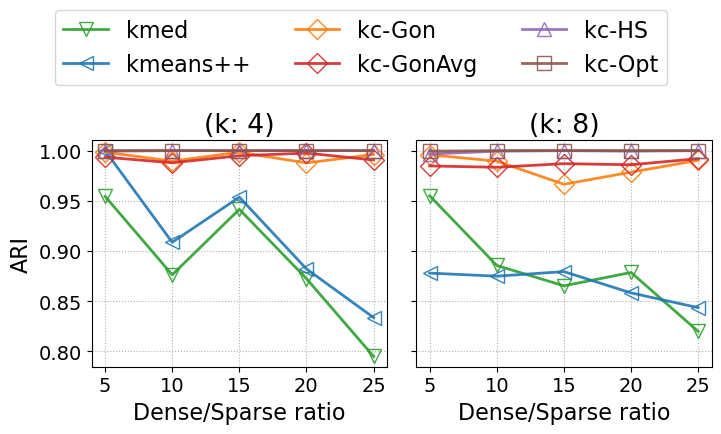

In [9]:

fig, ax = plt.subplots(1, 2, figsize = (7.5,4.5), sharey = True, sharex=True)

ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax[0].xaxis.set_major_formatter(FormatStrFormatter('%i'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%i'))

K_list = [4,8]
D = 2
for i, K in enumerate(tqdm(K_list)):
    
    df_ARI, df_epsVal = extractData(K,D,ratio_list )
    cols = ['kmed' , 'kmeans++', 'kc-Gon', 'kc-GonAvg', 'kc-HS', 'kc-Opt']

    
    for j, model in enumerate(cols):

        df_ARI.plot(x = 'Dense/Sparse ratio', y = model, marker = markers[j], fillstyle = 'none', color=col[j], ax = ax[i], markersize = 10, alpha = 0.9, linewidth = 2,legend = False)


    # ax[i].set_ylabel(r"Optimal value ($ \epsilon $) ")
    ax[i].set_ylabel("ARI")

    ax[i].grid(True,linestyle = ':')
    ax[i].set_title('\n\n\n(k: '+str(K)+')')
    # ax[i].set_title('\nNorm-Unb (k: '+str(K)+')')

    ax[i].tick_params(axis='both', which='major', labelsize=14)   
    ax[i].set_xticks([5,10,15,20,25])


# plt.title(' \n\n' ) 

fig.tight_layout()
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels , loc='upper center', mode = 'False', ncol=3, fontsize = 16, markerscale = 1)


plt.savefig(f'{RESULT_DIR}/Syn2.pdf', bbox_inches = 'tight')
# plt.rcParams.update({'font.size': 22})
plt.show()